## Segundo Examen Parcial  de Estadística Aplicada
Enero-Junio 2023

**Nombre:** Andrea Carolina López Ruiz<br>
**Matricula:** 1902969

**Instrucciones:** En cada punto importa las librerias que consideres necesarias

In [179]:
# Importa las librerias de numpy, python y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

# Importamos librerias de supervivencia
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test

In [180]:
# importa la base de datos llamada credit_risk.csv
# https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv
datos = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
datos

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,real_estate,67,None,own,2,official,1,1,1,1
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,real_estate,22,None,own,1,official,1,0,1,0
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,real_estate,49,None,own,1,unskilled,2,0,1,1
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,life_insurance,45,None,free,1,official,2,0,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,no_property,53,None,free,2,official,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,real_estate,31,None,own,1,unskilled,1,0,1,1
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,life_insurance,40,None,own,1,management,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,other,38,None,own,1,official,1,0,1,1
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,no_property,23,None,free,1,official,1,1,1,0


La base de datos es la información proporcionada por un banco donde nos muestra el tiempo que transcurre desde que un cliente pide un préstamo hasta que lo paga completamente (evento)

a continuación se muestran la descripción de la base de datos



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">   <br>Característica   </th>
    <th class="tg-fymr">   <br>Variable   </th>
    <th class="tg-fymr">   <br>Tipo   </th>
    <th class="tg-fymr">   <br>Descripción   </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">   <br>Time   </td>
    <td class="tg-0pky">   <br>duration   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Duration in month   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Event   </td>
    <td class="tg-0pky">   <br>full_repaid   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Specifies if the loan was fully   repaid   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>age   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Age of the borrower (in years)   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>foreign_worker   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower is a   foreign worker   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>personal_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Gender and Marital status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>people_liable   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of people being liable to   provide maintenance for   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>telephone   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower owns a   phone   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>employment_years   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Years of employment at current job   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>job   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Employment status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>housing   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Residential status of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>present_residence   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Years living at current residence   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>amount   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Amount of money borrowed   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>installment_rate   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Percentage of amount borrowed that   will be charged by a lender to a borrower.   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>purpose   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Reason to get a loan   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>checking_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the checking account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>credit_history   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Credit history of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>number_of_credits   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of existing credits at this   bank   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>other_installment_plans   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of installments plans the   borrower already has   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>savings_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the saving account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>property   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of valuable assets the   borrower owns   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>other_debtors   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Indicate if someone else will be   involved in the repayment or is guaranteeing the loan   </td>
  </tr>
</tbody>
</table>

<div class="alert alert-block alert-info">
<b>1. El banco sospecha que entre mas pasa el tiempo más díficil es que puedan pagar los clientes que se les concedió un préstamo. </b>
</div>

<div class="alert alert-block alert-info">
a) Calcula el promedio del monto del préstamo de los que pagaron y el promedio del monto de los que no han pagado.
</div>


In [181]:
#Para esto usaremos la variable llamada "full_repaid" que nos  dice si ya se cumplió el 
#evento (pagar o no pagar), esta variable es categorica es decir tiene 1(si ya se cumplió el evento) y 0(si no se ha cumplido)
#Para los que ya pagaron 
paid = datos[datos['full_repaid']==1]
paid.describe()

,duration,amount,installment_rate,present_residence,age,number_of_credits,people_liable,telephone,foreign_worker,full_repaid
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714,0.415714,0.952857,1.0
std,11.079564,2401.472278,1.128078,1.108373,11.381145,0.584721,0.362844,0.493197,0.212096,0.0
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,1.0
50%,18.000000,2244.000000,3.000000,3.000000,34.000000,1.000000,1.000000,0.000000,1.000000,1.0
75%,24.000000,3634.750000,4.000000,4.000000,42.250000,2.000000,1.000000,1.000000,1.000000,1.0
max,60.000000,15857.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.0


`El promedio del monto del préstamo de los que pagaron es: 2985.4571`

In [182]:
# Para los que no han pagado
nopaid = datos[datos['full_repaid'] == 0]
nopaid.describe()

,duration,amount,installment_rate,present_residence,age,number_of_credits,people_liable,telephone,foreign_worker,full_repaid
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333,0.376667,0.986667,0.0
std,13.282639,3535.818955,1.088395,1.094605,11.222379,0.559702,0.360911,0.485360,0.114889,0.0
min,6.000000,433.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,12.000000,1352.500000,2.000000,2.000000,25.000000,1.000000,1.000000,0.000000,1.000000,0.0
50%,24.000000,2574.500000,4.000000,3.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.0
75%,36.000000,5141.500000,4.000000,4.000000,40.000000,2.000000,1.000000,1.000000,1.000000,0.0
max,72.000000,18424.000000,4.000000,4.000000,74.000000,4.000000,2.000000,1.000000,1.000000,0.0


`El promedio del monto del préstamo de los que no han pagado es: 3938.1266`

<div class="alert alert-block alert-info">
b) Ajusta un modelo weibull y un modelo log-normal y graficas las funciones de riesgo respectivas.</div>

### Modelo Weibull

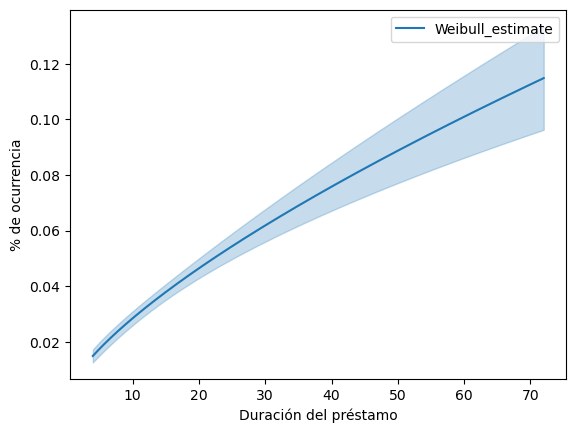

In [183]:
#Realizamos el modelo de weibull y graficamos la función de riesgo
weib = WeibullFitter().fit(datos['duration'], datos['full_repaid'])
weib.plot_hazard()
plt.xlabel("Duración del préstamo")
plt.ylabel('% de ocurrencia')
plt.show()

### Modelo Log-Norm

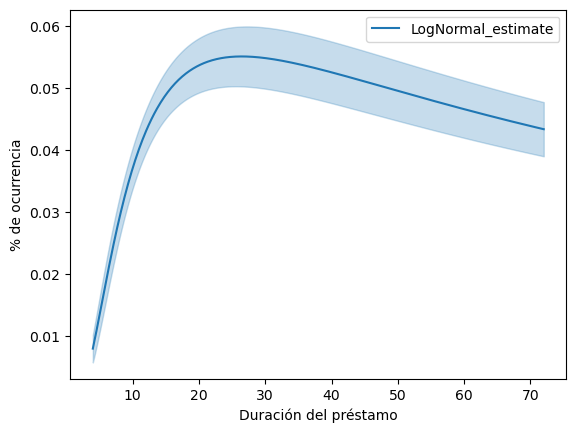

In [184]:
#Realizamos el modelo de Log-Nor y graficamos la función de riesgo
log = LogNormalFitter().fit(datos['duration'], datos['full_repaid'])
log.plot_hazard()
plt.xlabel('Duración del préstamo')
plt.ylabel('% de ocurrencia')
plt.show()

<div class="alert alert-block alert-info">
c) comenta que significa la grafica de la función de riesgo de la weibull respecto a si los clientes tardan en pagar
</div>

`Si los clientes tardan más en pagar es menos probable que paguen`

<div class="alert alert-block alert-info">
d) comenta que significa la grafica de la función de riesgo de la log-normal respecto a si los clientes tardan en pagar
</div>

`El riesgo de impago se incrementa durante los 20-30 meses del préstamo`

<div class="alert alert-block alert-info">
<b>2. Estima la función de supervivencia por el método de Kaplan-Meier para el tiempo que tardan los clientes en pagar y muestra su gráfica correspondiente<b>
</div>

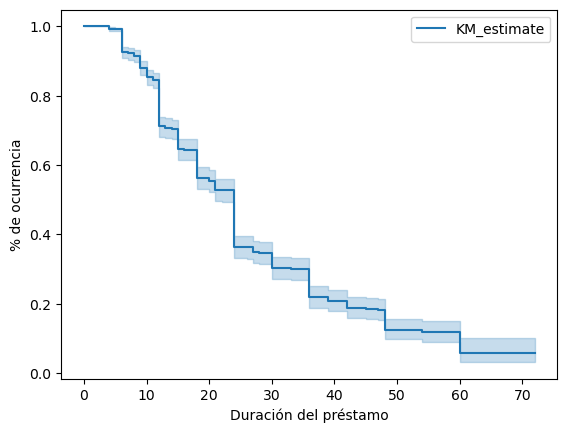

In [185]:
kmdatos = KaplanMeierFitter().fit(datos['duration'],datos['full_repaid'])
kmdatos.plot_survival_function( ci_show=True)
plt.xlabel('Duración del préstamo')
plt.ylabel('% de ocurrencia')
plt.show()

<div class="alert alert-block alert-info">
<b>3. Coloca la gráfica de kaplan Meier sobre la grafica de supervivencia log-normal <b>
</div>

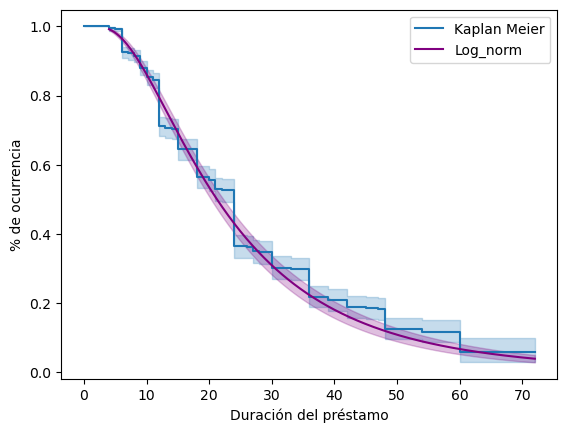

In [186]:
kmdatos.plot_survival_function(label='Kaplan Meier')
log.plot_survival_function(label='Log_norm',color='purple')
plt.xlabel('Duración del préstamo')
plt.ylabel('% de ocurrencia')
plt.show()

<div class="alert alert-block alert-info">
<b>4. Comenta si las graficas se parecen o no, y en que se diferencian<b>
</div>

`Las gráficas se parecen y siguen un comportamiento parecido a lo largo de la duración del préstamo`

<div class="alert alert-block alert-info">
<b>5. El banco considera que los que piden préstado una gran cantidad de dinero en realidad nunca piensan pagar<b>
</div>

<div class="alert alert-block alert-info">
a) calcula la mediana de la cantidad que pidieron prestado (amount of money borrowed), asigna un 1 a quienes se encuentran igual o arriba 
de la mediana (deben mucho) y 0 a los que se encuentran debajo de la mediana (deben poco)
</div>

In [187]:
#obtenemos la mediana
mediana = statistics.median(datos["amount"])
mediana

2319.5

`la mediana es 2319.5`

In [188]:
#agregamos una columna con la condición
datos["situación"]=np.where(datos['amount']>=mediana,1,0)
datos

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid,situación
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,67,None,own,2,official,1,1,1,1,0
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,22,None,own,1,official,1,0,1,0,1
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,49,None,own,1,unskilled,2,0,1,1,0
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,45,None,free,1,official,2,0,1,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,53,None,free,2,official,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,31,None,own,1,unskilled,1,0,1,1,0
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,40,None,own,1,management,1,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,38,None,own,1,official,1,0,1,1,0
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,23,None,free,1,official,1,1,1,0,0


<div class="alert alert-block alert-info">
b) Elabora y grafica juntas las funciones de supervivencia por el método de Kaplan-Meier para los que deben mucho y para los que deben poco.
</div>

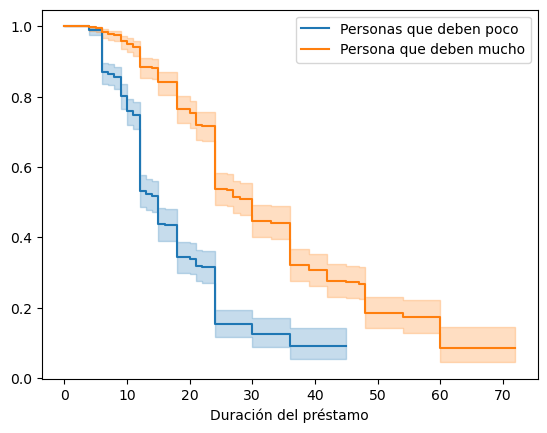

In [189]:
#Modelo KM para personas que deben mucho
mucho=datos.query("situación==1") # separamos las tablas por situación
kmmucho=KaplanMeierFitter().fit(mucho['duration'],mucho['full_repaid'])

#Modelo KM para personas que deben poco
poco=datos.query("situación==0")
kmpoco = KaplanMeierFitter().fit(poco['duration'], poco['full_repaid'])

#Graficamos las funciones de supervivencia
kmpoco.plot_survival_function(label="Personas que deben poco")
kmmucho.plot_survival_function(label="Persona que deben mucho")
plt.xlabel("Duración del préstamo")
plt.show()

<div class="alert alert-block alert-info">
c)Interpreta las graficas de supervivencia, ¿qué significan? ¿quién paga más rápido? ¿quién tarda en pagar más?  
</div>

`Los que pagan más rápido son los que están debajo de la mediana`
<br> `Los que tardan más en pagar son los que pidieron un préstamo más alto `

<div class="alert alert-block alert-info">
d)Elabora un log-rank test para comprobar si las funciones de supervivencia de los que deben mucho y los que deben poco son distintas, e interpreta el resultado de la prueba
</div>

In [190]:
#Hacemos la prueba de log rank
lrt = logrank_test(poco['duration'], mucho['duration'],
                  poco['full_repaid'],mucho['full_repaid'])

In [191]:
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         199.26 <0.005    147.89

Ho: funciones de supervivencia = <br>
Ha: funciones de supervivencia $\neq$

p-valor< $\alpha$ -> Rechazamos H0<br>
0.005<0.05 $\therefore$Rechazamos H0<br>
$\Rightarrow$ A un 95% de confianza rechazamos h0 y entonces *las funciones de supervivencia son diferentes* 

<div class="alert alert-block alert-info">
e) ¿el banco tenía razón? Explique
</div>

`El banco puede tener algo de razón o desconfianza en que los clientes que piden un préstamo de gran magnitud no va a pagar, pero podemos ver que tardan alrededor de 70 meses en pagar`

<div class="alert alert-block alert-info">
<b>6. Elige seis variables para ajustar un modelo de cox de riesgos porporcionales. Antes de correr el modelo explica en qué sentido y por qué afectan el riesgo de pagar el préstamo cada una de las variables elegidas<b>
</div>

### Variables a elegir
- <b>Age:</b> Influye en sus ingresos, ya que si es una persona de más de 30 seguramente tenga un mejor ingreso<br>
- <b>Telephone:</b> Si una persona no cuenta con un método de contacto, es más probable que no pague  
- <b>Number of credits:</b> Tener otros créditos puede generar atrasos en el cumplimiento de pagos <br>
- <b>People Liable:</b> Personas a las que tiene que mantener<br>
- <b>Foreign Worker:</b> Diferente tipo de cambio, puede generar dificultades o generar mejor tiempo para pagar <br>
- <b>Amount:</b> Cantidad de dinero préstado, entre mayor dinero solicitado puede tardar más en pagar<br>

<div class="alert alert-block alert-info">
<b>7. Interpreta la regresión de Cox<b>
</div>

In [192]:
#Para age
#separamos los datos a analizar
age = datos[['duration','age','full_repaid']]

#realizamos la regresión
coxage = CoxPHFitter().fit(age,'duration','full_repaid')
coxage.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4266.36
         time fit was run = 2023-04-04 06:51:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.00             0.00             0.01                 1.00                 1.01

            cmp to    z    p   -log2(p)
covariate                              
age           0.00 2.49 0.01       6.31
---
Concordance = 0.54
Partial AIC = 8534.72
log-likelihood ratio test = 6.05 on 1 df
-log2(p) of ll-ratio test = 6.17

In [201]:
#Para Telephone
#separamos los datos a analizar
telephone = datos[['duration','telephone','full_repaid']]

#realizamos la regresión
coxtel = CoxPHFitter().fit(telephone,'duration','full_repaid')
coxtel.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4265.43
         time fit was run = 2023-04-04 07:02:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
telephone  -0.22       0.81       0.08            -0.37            -0.06                 0.69                 0.94

            cmp to     z    p   -log2(p)
covariate                               
telephone     0.00 -2.80 0.01       7.60
---
Concordance = 0.55
Partial AIC = 8532.86
log-likelihood ratio test = 7.91 on 1 df
-log2(p) of ll-ratio test = 7.67

In [195]:
#Para Number of credits
#separamos los datos a analizar
NOC = datos[['duration','number_of_credits','full_repaid']]

#realizamos la regresión
coxNOC = CoxPHFitter().fit(NOC,'duration','full_repaid')
coxNOC.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4268.82
         time fit was run = 2023-04-04 06:52:22 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
number_of_credits   0.07       1.07       0.07            -0.06             0.20                 0.94                 1.22

                    cmp to    z    p   -log2(p)
covariate                                      
number_of_credits     0.00 1.07 0.29       1.81
---
Concordance = 0.50
Partial AIC = 8539.65
log-likelihood ratio test = 1.12 on 1 df
-log2(p) of ll-ratio test = 1.79

In [196]:
#Para People Liable
#separamos los datos a analizar
PL = datos[['duration','people_liable','full_repaid']]

#realizamos la regresión
coxPL = CoxPHFitter().fit(PL,'duration','full_repaid')
coxPL.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4269.28
         time fit was run = 2023-04-04 06:53:32 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
people_liable   0.05       1.05       0.10            -0.16             0.25                 0.85                 1.29

                cmp to    z    p   -log2(p)
covariate                                  
people_liable     0.00 0.45 0.65       0.61
---
Concordance = 0.51
Partial AIC = 8540.57
log-likelihood ratio test = 0.20 on 1 df
-log2(p) of ll-ratio test = 0.61

In [198]:
#Para Foreign Worker
#separamos los datos a analizar
fc = datos[['duration','foreign_worker','full_repaid']]

#realizamos la regresión
coxfc = CoxPHFitter().fit(fc,'duration','full_repaid')
coxfc.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4253.74
         time fit was run = 2023-04-04 06:55:20 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
foreign_worker  -1.18       0.31       0.18            -1.54            -0.83                 0.22                 0.44

                 cmp to     z      p   -log2(p)
covariate                                      
foreign_worker     0.00 -6.58 <0.005      34.32
---
Concordance = 0.53
Partial AIC = 8509.48
log-likelihood ratio test = 31.29 on 1 df
-log2(p) of ll-ratio test = 25.42

In [200]:
#Para Amount
#separamos los datos a analizar
amount = datos[['duration','amount','full_repaid']]

#realizamos la regresión
coxNOC = CoxPHFitter().fit(amount,'duration','full_repaid')
coxNOC.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4124.50
         time fit was run = 2023-04-04 06:57:28 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
amount     -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

            cmp to      z      p   -log2(p)
covariate                                  
amount        0.00 -14.03 <0.005     146.03
---
Concordance = 0.73
Partial AIC = 8250.99
log-likelihood ratio test = 289.78 on 1 df
-log2(p) of ll-ratio test = 213.45

**Prueba de Hipótesis.**<br>
**Ho:** Bi = 0<br>
**H1:** Bi $\neq$ 0<br>
 p-value < $\alpha$ (.05) ->  Se rechaza Ho.

- <b>Age:</b> 0.01<$\alpha$ Se rechaza H0, $\therefore$La variable es significativa en el modelo y se dice que la edad si tiene influencia en el tiempo de pago<br> 
- <b>Telephone:</b> 0.01<$\alpha$ Se rechaza h0, $\therefore$ El tener o no un método de contacto influye en si vas a pagar o no, ya que no teniendolo puede ser que como no te contactan no llegas a pagar<br> 
- <b>Number of credits:</b> 0.29<$\alpha$ No se rechaza h0, $\therefore$Esta variable no es significativa, tener más créditos no nos dice si vas a pagar o no<br>
- <b>People Liable:</b> 0.65<$\alpha$ No se rechaza h0,$\therefore$La variable no es significativa, tener personas a las que mantener no influye en si pagarás o no <br>
- <b>Foreign Worker:</b> 0.005< $\alpha$ Se rechaza h0, $\therefore$ Esta variable influye en nuestro modelo tener diferente tipo de cambio puede ser que nos paguen más pronto o no paguen por recibir menos  <br>
- <b>Amount:</b> 0.005<$\alpha$Se rechaza h0, $\therefore$ La variable es significativa<br>

<div class="alert alert-block alert-info">
<b>8. Con base en el análisis hecho hasta ahora qué recomendación podría hacer al banco para mejorar sus políticas de préstamo<b>
</div>

`Recomiendo verificar a profundidad las variables que son significativas, ya que con esto podemos ver su peso (si es negativo o positivo) por ejemplo si el hacer préstamos a foráneos tarda menos o más tiempo de pago y a partir de esto tomar decisiones sobre si merece la pena prestar más a estas personas o menos` <br>
`También recomendaría pedir un método de comunicación tal como el telefono celular, ya que como concluimos anteriormente este tiene peso en nuestro modelo, y tal vez no se le presta la atención que merece`<br>
`La cantidad prestada también es importante y si queremos que nos paguen tenemos que estar más al pendiente de las anteriores variables para garantizar que nos paguen`